# Step 1: Install and import modules

In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [2]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [3]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Image loading and text recognition using EasyOCR

In [4]:
im_1_path = './images/1_carplate.jpg'
im_2_path = './images/2_handwriting.jpg'
im_3_path = './images/3_digits.jpg'
im_4_path = './images/4_invoice.jpg'
im_5_path = './images/5_sign.jpg'

In [5]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [6]:
result = recognize_text(im_1_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [7]:
result

[([[1421, 1139], [1453, 1139], [1453, 1177], [1421, 1177]],
  'S',
  0.8625819477165351),
 ([[1524, 1038], [2201, 1038], [2201, 1211], [1524, 1211]],
  'CCC444',
  0.9068348515895301),
 ([[1641, 1201], [2012, 1201], [2012, 1245], [1641, 1245]],
  'T E S L A.C O M',
  0.33458756243407134),
 ([[2519, 1254], [2790, 1254], [2790, 1284], [2519, 1284]],
  'DUAL MSTOF',
  0.24584700695087508)]

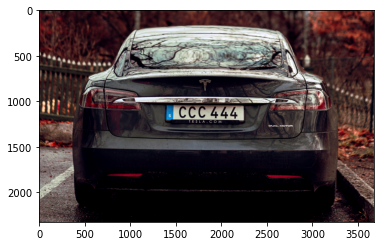

In [8]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Step 3: Overlay recognized text on image using OpenCV

In [9]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: S (Probability: 0.86)
Detected text: CCC444 (Probability: 0.91)


<Figure size 432x288 with 0 Axes>

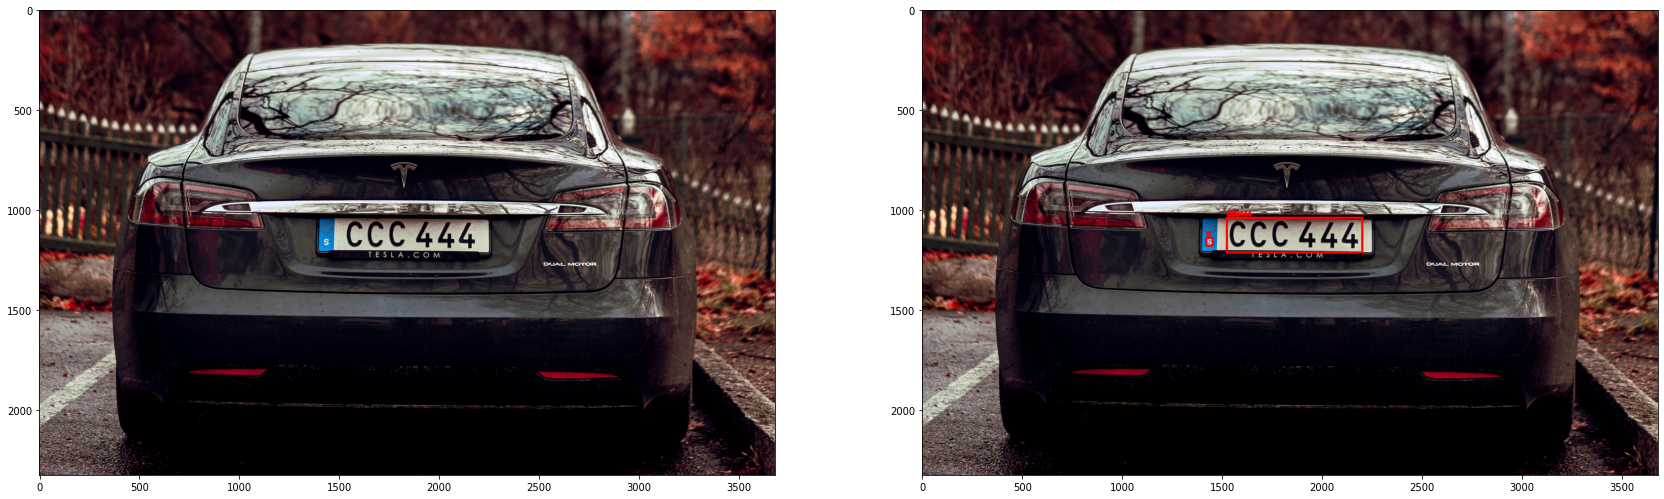

In [10]:
overlay_ocr_text(im_1_path, '1_carplate')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: Dont Send (Probability: 0.53)
Detected text: LMAO (Probability: 0.69)
Detected text: If (Probability: 0.58)
Detected text: ArenT (Probability: 0.60)
Detected text: Laughing (Probability: 0.87)
Detected text: You (Probability: 0.68)


<Figure size 432x288 with 0 Axes>

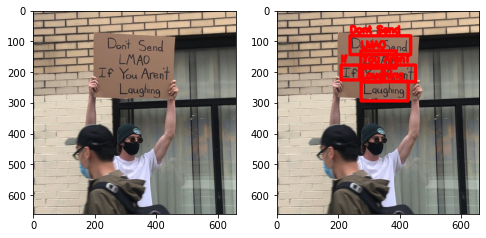

In [11]:
overlay_ocr_text(im_2_path, '2_handwriting')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: 30,480 (Probability: 0.99)
Detected text: KGS (Probability: 0.99)
Detected text: 67,200 (Probability: 0.78)
Detected text: LBS (Probability: 0.61)
Detected text: 2,185 (Probability: 1.00)
Detected text: KGS (Probability: 0.98)
Detected text: 4,820 (Probability: 0.73)
Detected text: LBS (Probability: 0.80)


<Figure size 432x288 with 0 Axes>

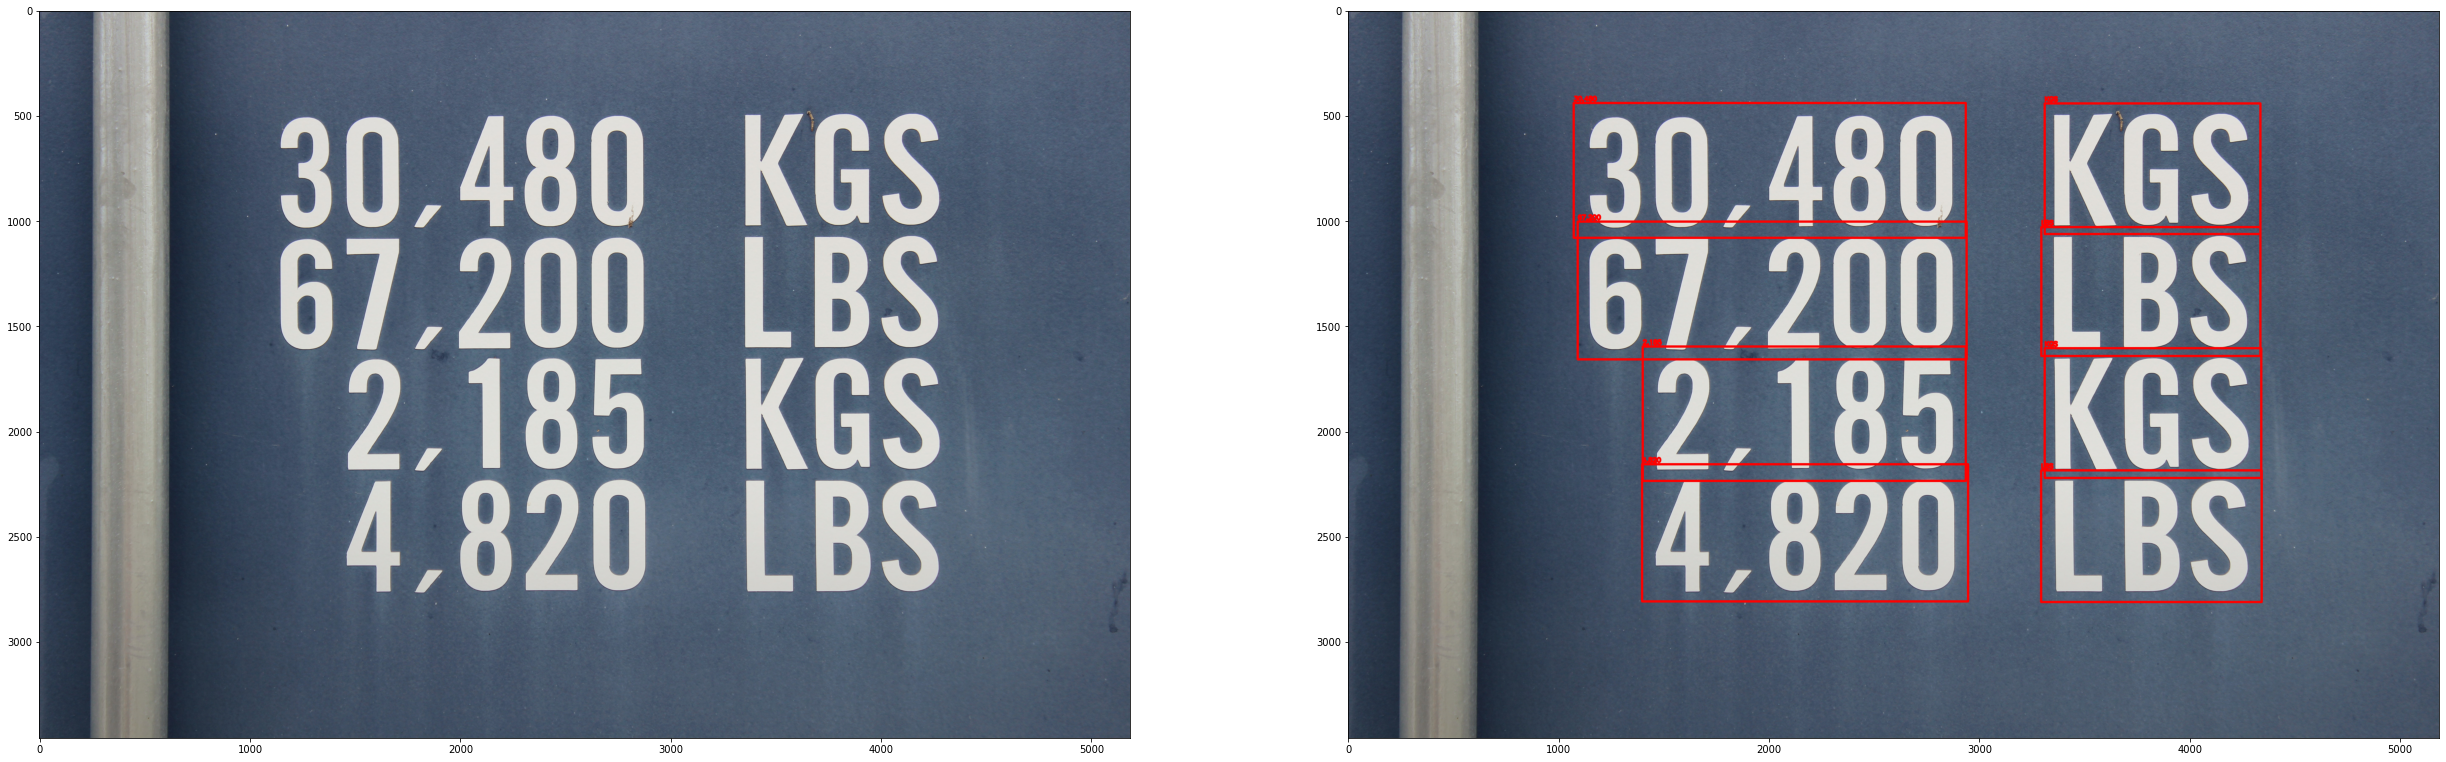

In [12]:
overlay_ocr_text(im_3_path, '3_digits')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: Builders Inc. (Probability: 1.00)
Detected text: Ninja Sample (Probability: 0.93)
Detected text: 123 Ninja Blvd. (Probability: 0.71)
Detected text: 987 Conway Blvd. (Probability: 0.84)
Detected text: Contact@lnvoicelinja. com (Probability: 0.52)
Detected text: NinjaLand, 97315 (Probability: 0.66)
Detected text: Los Angeles, California 90210 (Probability: 0.83)
Detected text: 1-800-555-Ninja (Probability: 0.97)
Detected text: United States (Probability: 0.83)
Detected text: United States (Probability: 0.95)
Detected text: demo@invoiceninja. com (Probability: 0.67)
Detected text: Invoice Number (Probability: 1.00)
Detected text: 1564 (Probability: 0.68)
Detected text: INVOICE#1564 (Probability: 0.99)
Detected text: PO Number (Probability: 1.00)
Detected text: 1-259 (Probability: 0.59)
Detected text: Invoice Date (Probability: 0.96)
Detected text: Aug 4, 2015 (Probability: 0.56)
Detected text: Due Date (Probability: 0.69)
Detected text: Aug 31, 2015 (Probability: 0.55)
Dete

<Figure size 432x288 with 0 Axes>

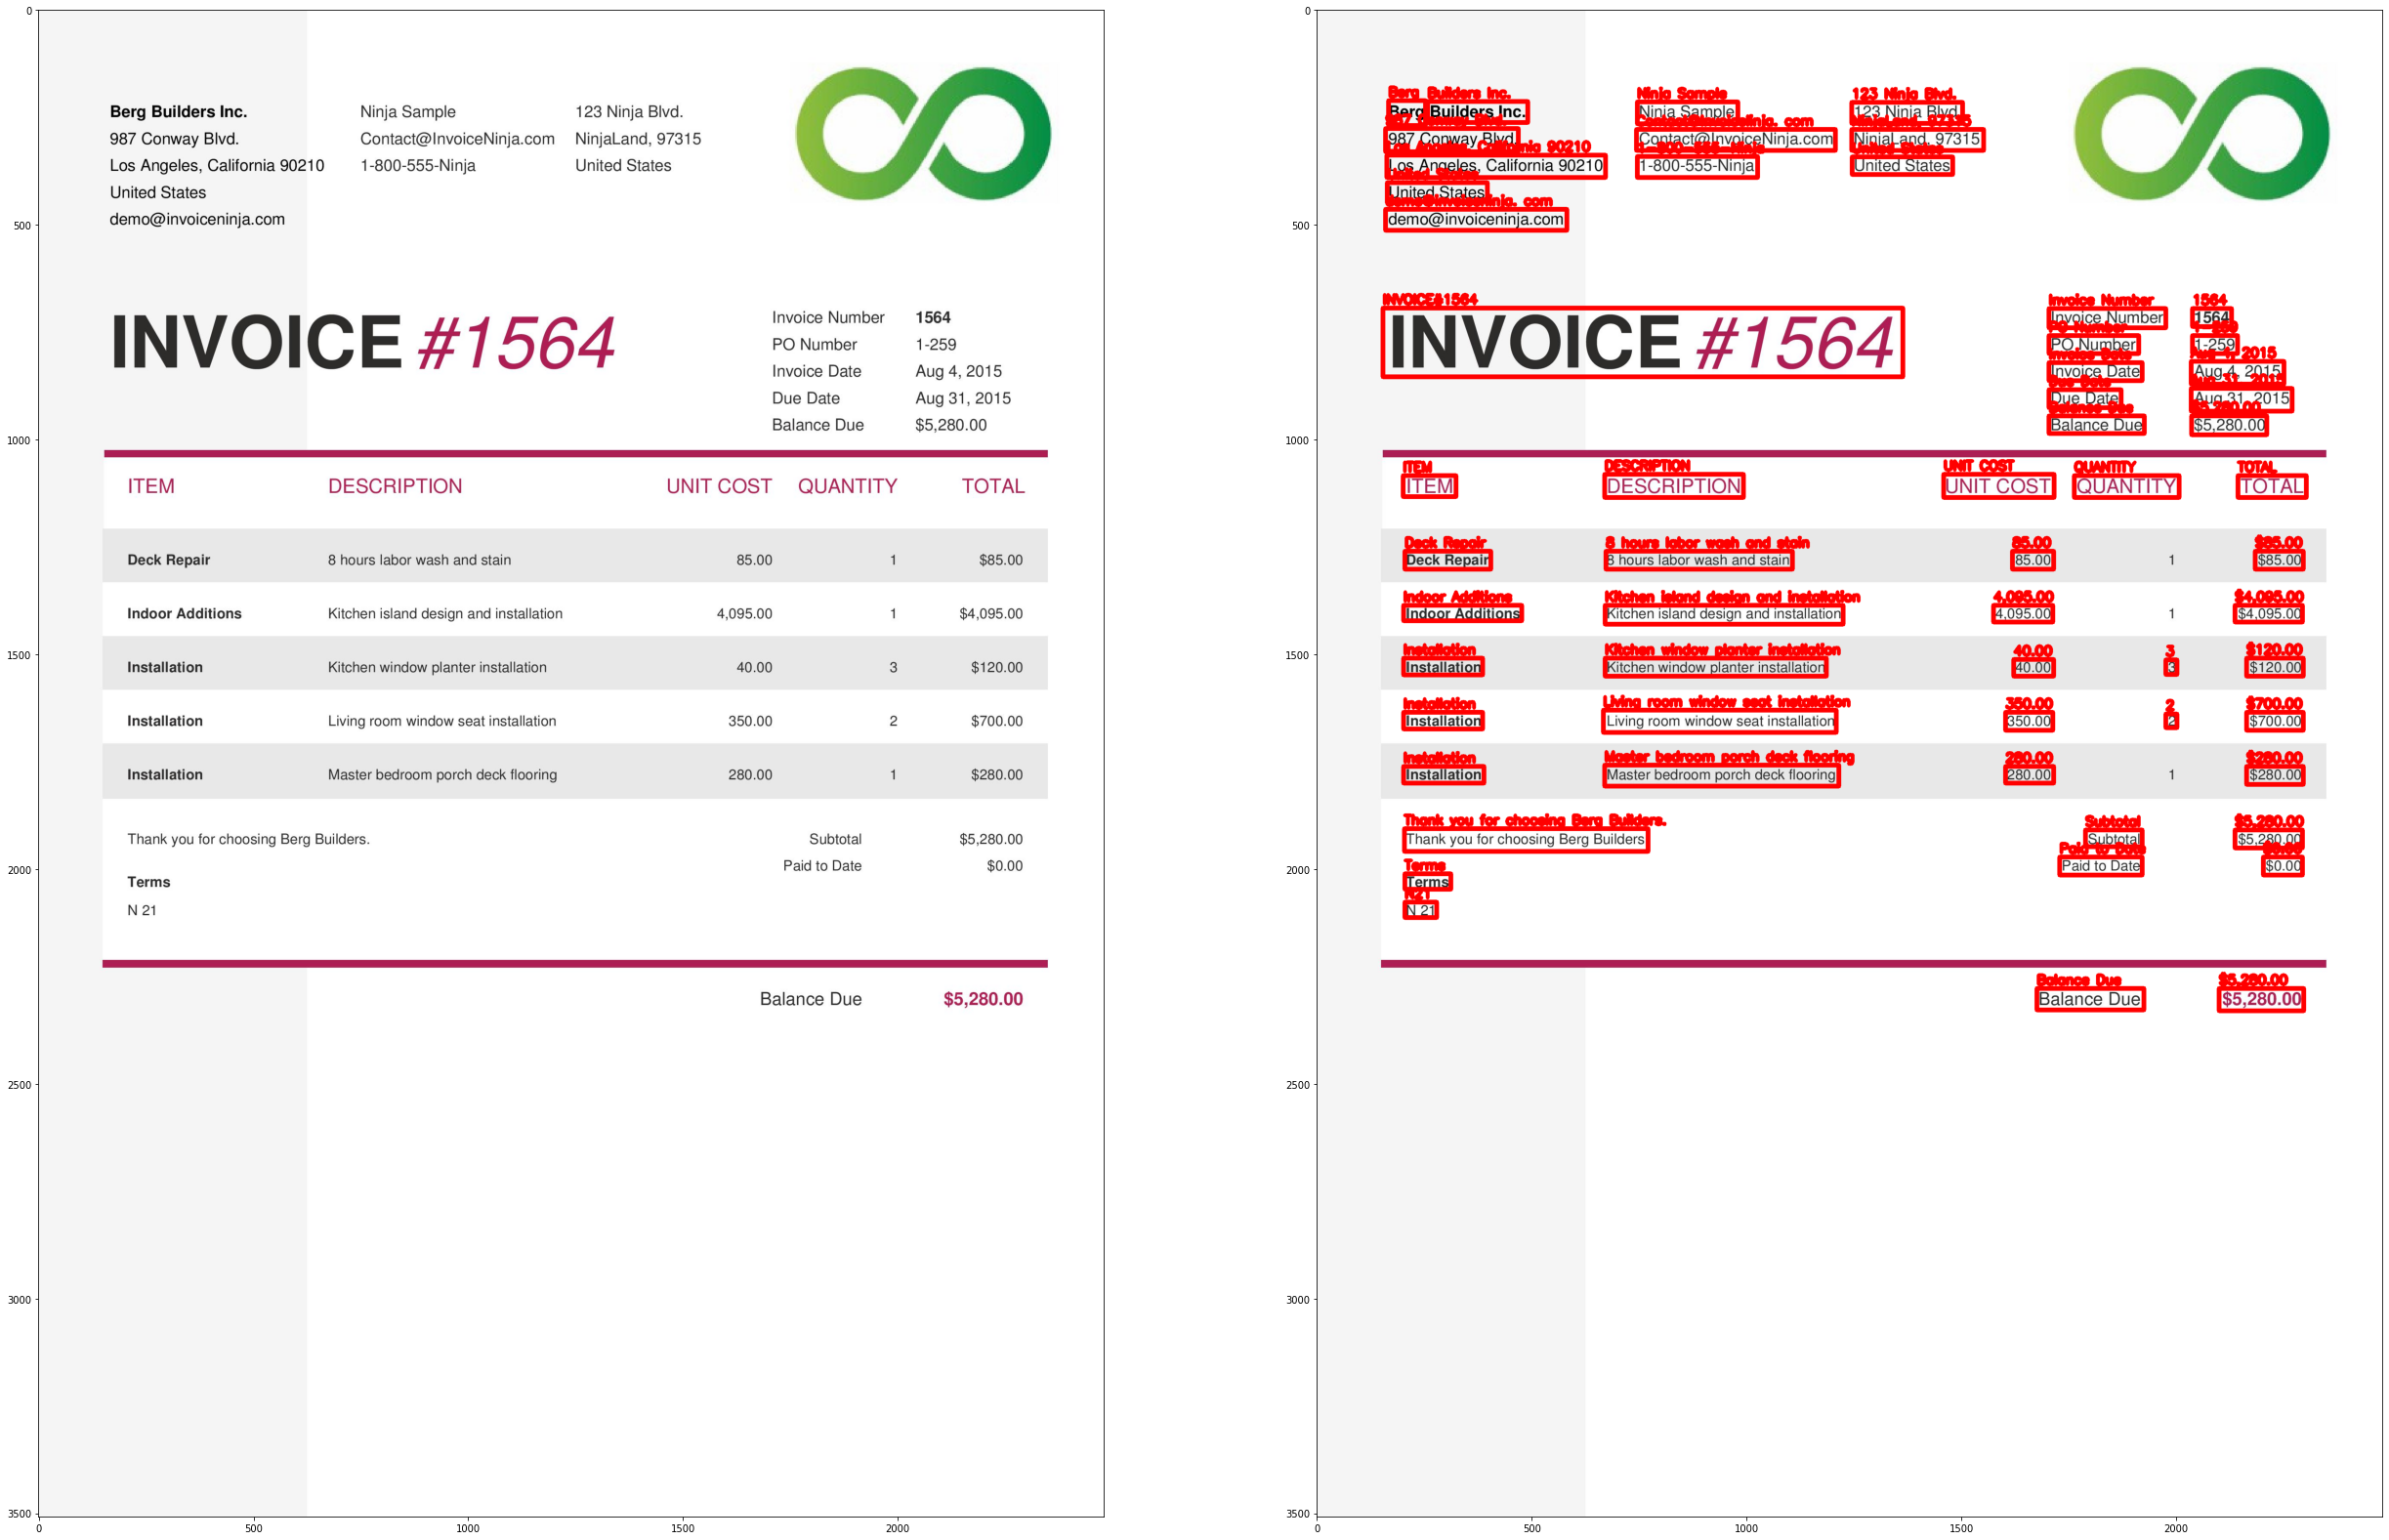

In [13]:
overlay_ocr_text(im_4_path, '4_invoice')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: NOTICE (Probability: 1.00)
Detected text: THANK (Probability: 1.00)
Detected text: YOU (Probability: 0.75)
Detected text: FOR (Probability: 0.92)
Detected text: NOTICING (Probability: 1.00)
Detected text: THIS (Probability: 0.82)
Detected text: NEW (Probability: 1.00)
Detected text: NOTICE (Probability: 0.62)
Detected text: YOUR (Probability: 0.89)
Detected text: NOTICING (Probability: 1.00)
Detected text: IT (Probability: 1.00)
Detected text: HAS (Probability: 1.00)
Detected text: BEEN (Probability: 1.00)
Detected text: NOTED (Probability: 1.00)
Detected text: AND WILL BE REPORTED TO THE AUTHORITIES (Probability: 0.56)


<Figure size 432x288 with 0 Axes>

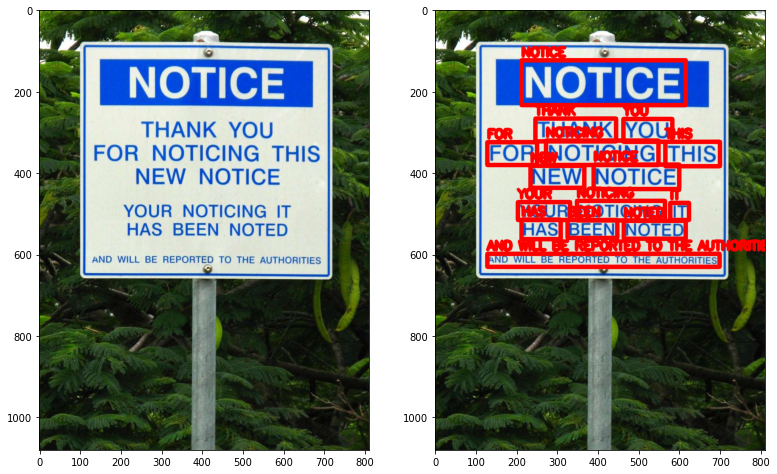

In [14]:
overlay_ocr_text(im_5_path, '5_roadsign')

# Bonus: Text-to-speech recognition 

In [15]:
!pip install pyttsx3

In [16]:
result = recognize_text(im_5_path)

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
print(sentence)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


NOTICE THANK YOU FOR NOTICING THIS NEW NOTICE YOUR NOTICING IT HAS BEEN NOTED AND WILL BE REPORTED TO THE AUTHORITIES 


In [17]:
import pyttsx3

engine = pyttsx3.init()
engine.setProperty('rate', 100)
engine.say(sentence)
engine.runAndWait()